## Question 1
The following table indicates the number of 6-point scores in an American rugby match in the 1979 season.

![](table1.png)

Based on these results, we create a Poisson distribution with the sample mean parameter  = 2.435. Is there any reason to believe that at a .05 level the number of scores is a Poisson variable?

In [117]:
import scipy
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
##https://towardsdatascience.com/exploring-normal-distribution-with-jupyter-notebook-3645ec2d83f8

In [241]:
#trying to work with probabilities:

mu =2.435 #this would be the sum of each number times it's probability. the average score is 2.435

'''mu of a poisson random variable x is equal to lambda'''

original_values=np.array([35,99,104,110,62,25,10,3])
original_values= [i/448 for i in original_values]  #probability
print(original_values)

#a probability mass function (PMF) is a function that gives the probability 
#that a discrete random variable is exactly equal to some value
expected_values=[stats.poisson.pmf(x, mu) for x in range(8)] #We get a pmf value for each x in the range.
#not sure about the unit of the mean here.
print(expected_values)

stats.chisquare(original_values, f_exp=expected_values)


[0.078125, 0.22098214285714285, 0.23214285714285715, 0.24553571428571427, 0.13839285714285715, 0.05580357142857143, 0.022321428571428572, 0.006696428571428571]
[0.7375842205000299, 0.22450219711469657, 0.03416642812339289, 0.0034664688533525673, 0.0002637766143097971, 1.6057401396108896e-05, 8.145785916567738e-07, 3.541962269079004e-08]


Power_divergenceResult(statistic=2162.4225985440025, pvalue=0.0)

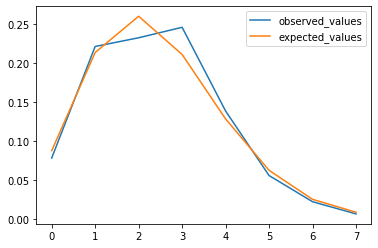

In [213]:
plt.plot(original_values, label = 'observed_values')
plt.plot(expected_values, label = 'expected_values')
plt.legend()
plt.show()

In [214]:
#Trying to work with the real numbers
mu =2.435

'''mu of a poisson random variable x is equal to lambda'''

original_values2=np.array([35,99,104,110,62,25,10,3])
expected_values2=[stats.poisson.pmf(x, mu)*448 for x in range(8)]
print(original_values2)
print(expected_values2)

stats.chisquare(original_values2, f_exp=expected_values2)

#, but I don't get why I end up with different p-values when i/m working w/ stats or probability.
#I think the issue is the mean...

[ 35  99 104 110  62  25  10   3]
[39.243790677529816, 95.55863029978511, 116.34263238998835, 94.4314366232072, 57.48513704437739, 27.995261740611806, 11.361410389731613, 3.952147756999499]


Power_divergenceResult(statistic=5.526588649191276, pvalue=0.5959787428784398)

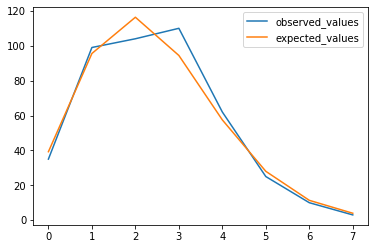

In [215]:
plt.plot(original_values2, label = 'observed_values')
plt.plot(expected_values2, label = 'expected_values')
plt.legend()
plt.show()

In [ ]:
#they are the same disribution

## Question 2
The following are the ordered values of a random sample of SAT scores (university entrance exam) for several students: 852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063. In previous years, the scores were presented by N (985,50). Based on the sample, is there any reason to believe that there has been a change in the distribution of scores this year? Use the level alpha = 0.05. 

In [176]:
#your answer here

observed_values=np.array([852, 875, 910, 933, 957, 963, 981, 998, 1010, 1015, 1018, 1023, 1035, 1048, 1063])
stats.kstest(observed_values, stats.norm(loc=985, scale=50).cdf)


#How to plot expected values? when I don't plot, I don't understand

KstestResult(statistic=0.1581291279406798, pvalue=0.847406396427736)

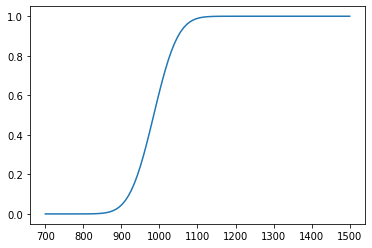

In [232]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(700, 1500, 100)
y = stats.norm.cdf(x, loc=985, scale=50) #.cdf
#ax.plot(observed_values)
ax.plot(x,y)
#I don't get this graph

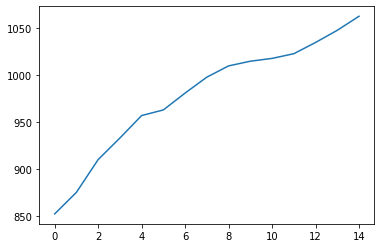

In [230]:
fig, ax = plt.subplots(1, 1)
ax.plot(observed_values)

## Question 3
Let's analyze a discrete distribution. To analyze the number of defective items in a factory in the city of Medellín, we took a random sample of n = 60 articles and observed the number of defectives in the following table:

![](table2.png)

A poissón distribution was proposed since it is defined for x = 0,1,2,3, .... using the following model:

![](image1.png)

Does the distribution of defective items follow this distribution?

0.9666666666666667
[0 1 2 3 4]
[32 15  0  9  4]
[22.820925395355513, 22.060227882176992, 10.66244347638555, 3.435676231279788, 0.8302884225592823]


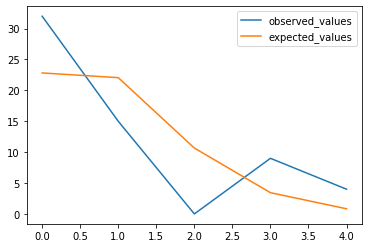

Power_divergenceResult(statistic=37.72656768931596, pvalue=1.2759420913385983e-07)

In [240]:
# your code here
qtd = np.arange(5)# 0 to 4, includes 2
original_values =np.array([32, 15, 0, 9, 4])  #include frequency of 0 to 2 defective items

#a probability mass function (PMF) is a function that gives the probability 
#that a discrete random variable is exactly equal to some value
mu = sum([x[0] * x[1] for x in list(zip(qtd,frequency))])/60
print(mu) # I don't understand this mean calculation, but the result when \60 makes more sense then  \5.
#so mean would be almost 1 defective item.

expected_values=[stats.poisson.pmf(x, mu)*60 for x in qtd] #We get a pmf value for each x in qtd.
print(qtd)
print(original_values)
print(expected_values)


fig, ax = plt.subplots(1, 1)
#ax.plot(qtd, frequency, label='test')

plt.plot(original_values, label = 'observed_values')
plt.plot(expected_values, label = 'expected_values')
plt.legend()
plt.show()


stats.chisquare(original_values, f_exp=expected_values)
#the low p-value says they are different.

## Question 4
A quality control engineer takes a sample of 10 tires that come out of an assembly line, and would like to verify on the basis of the data that follows, if the number of tires with defects observed over 200 days, if it is true that 5% of all tires have defects (that is, if the sample comes from a binomial population with n = 10 and p = 0.05). 

![](table3.png)


In [201]:
# your answer here

n=10
p=0.05

expected = stats.binom.pmf(np.arange(3), n, p)*200

stats.chisquare([138,53,9], f_exp=expected)

Power_divergenceResult(statistic=6.730152995610064, pvalue=0.034559372300758)

## Question 5
A researcher gathers information about the patterns of Physical Activity of children in the fifth grade of primary school of a public school. He defines three categories of physical activity (Low, Medium, High). He also inquires about the regular consumption of sugary drinks at school, and defines two categories (Yes = consumed, No = not consumed). We would like to evaluate if there is an association between patterns of physical activity and the consumption of sugary drinks for the children of this school, at a level of 5% significance. The results are in the following table: 

![](table4.png)

In [254]:
#your answer here

test_yes = np.array([32,14,6])
test_no = np.array([12,22,9])

print(test_yes.mean(),test_no.mean())
print(test_yes.std(),test_no.std())

#loc, scale = stats.norm.fit(test_yes)
#loc, scale

#loc, scale = stats.norm.fit(test_no)
#loc, scale


scipy.stats.ks_2samp(test_yes, test_no)


#they are identical?

17.333333333333332 14.333333333333334
10.873004286866728 5.557777333511022


Ks_2sampResult(statistic=0.3333333333333333, pvalue=1.0)

In [257]:
#other students did: # chi2 test
observed = np.array([[32, 14, 6], [12, 22, 9]])
achi2, pvalue, dof, expected = stats.chi2_contingency(observed)
pvalue

0.004719280137040844